# **Data Visualization**


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-06-10 16:35:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.1’

survey-data.csv.1   100%[===================>] 152.13M  54.7MB/s    in 2.8s    

2025-06-10 16:35:13 (54.7 MB/s) - ‘survey-data.csv.1’ saved [159525875/159525875]



In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')
pd.set_option('display.max_columns', None)

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [ ]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [14]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check.head(5))


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [15]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Listing All Tables


To view the names of all tables in the database:


In [16]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [17]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Describing a table

Use this query to get the schema of a specific table, main in this case:


In [18]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


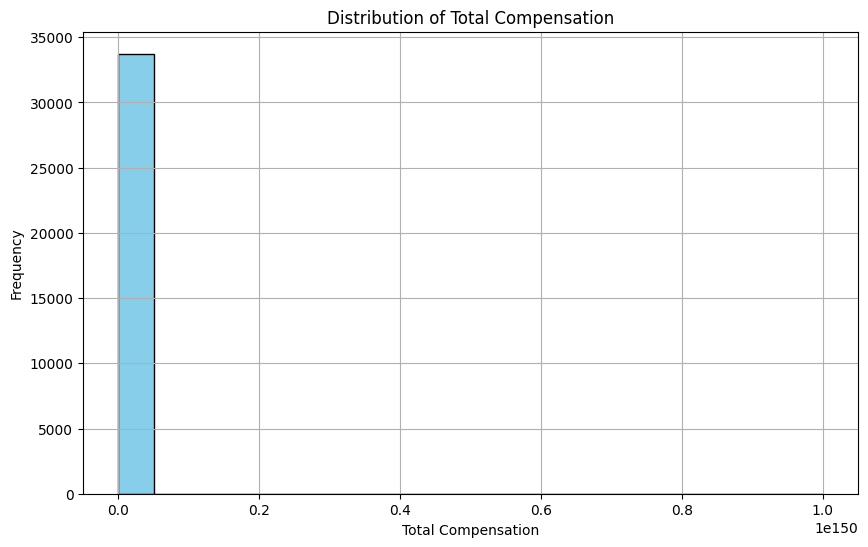

In [21]:
#querying from SQLite Database table
QUERY = """
SELECT CompTotal, COUNT(*) as count
FROM main
GROUP BY CompTotal
ORDER BY CompTotal
"""
pd.read_sql_query(QUERY, conn)
# Drop missing or zero values for compensation
comp_data = df['CompTotal'].dropna()
comp_data = comp_data[comp_data > 0]

# Optional: filter out extreme outliers (e.g., top 1%) for readability
comp_data = comp_data[comp_data < comp_data.quantile(0.99)]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'].dropna(), bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Total Compensation')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Number of Respondents')

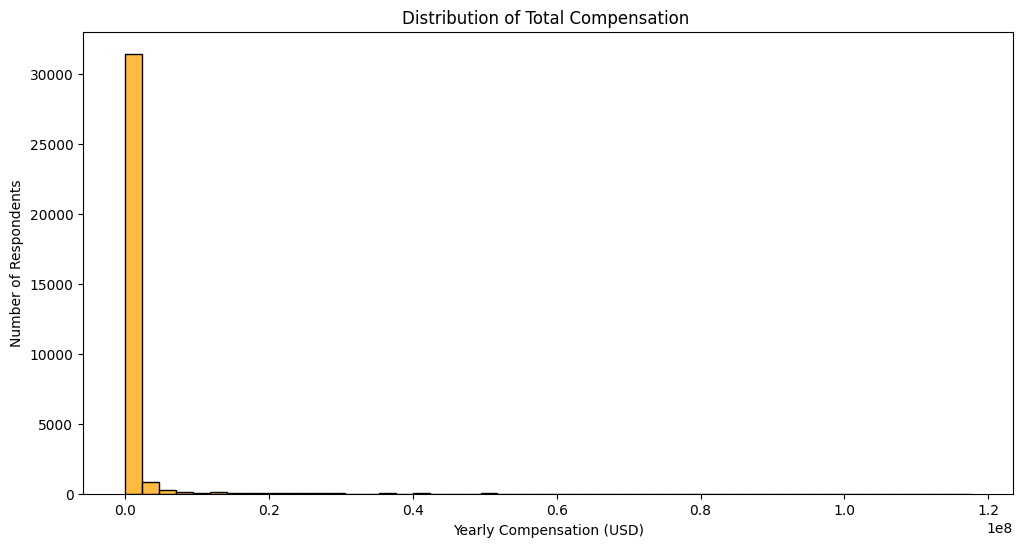

In [20]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')
pd.set_option('display.max_columns', None)
!pip install seaborn
import seaborn as sns
comp = df['CompTotal'].dropna()
comp = comp[comp < comp.quantile(0.99)]  # Optional: remove top 1% to reduce skew

# Set plot size and style
plt.figure(figsize=(12, 6))
sns.histplot(comp, bins=50,  color='orange')
plt.title('Distribution of Total Compensation ')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')

**Box Plots**

Plot a box plot of Age.


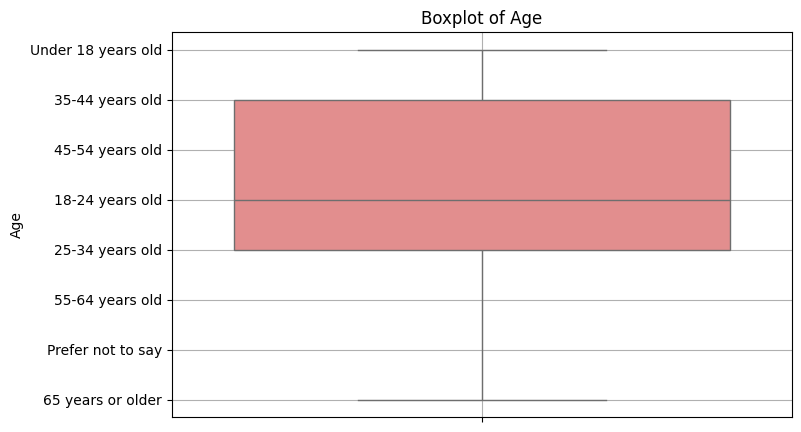

In [38]:
#querying from SQLite Database table
QUERY = """
SELECT Age
FROM main
"""
df1 = pd.read_sql_query(QUERY, conn)

# Creating the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=df1['Age'], color='lightcoral')
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.grid(True)
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


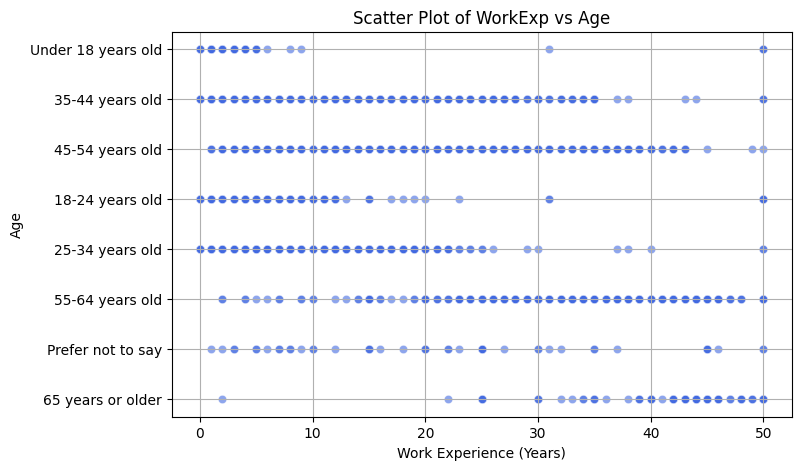

In [39]:
#querying from SQLite Database table
QUERY = """
SELECT Age, WorkExp
FROM main
"""
df1 = pd.read_sql_query(QUERY, conn)

# Creating the scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df1['WorkExp'], y=df1['Age'], color='royalblue', alpha=0.6)
plt.title('Scatter Plot of WorkExp vs Age')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Age')
plt.grid(True)
plt.show()

**Bubble Plots**

Create a bubble plot of `JobSat` and `WorkExp` using the Age column as the bubble size.


In [43]:
QUERY = """
SELECT * FROM main
"""

df1 = pd.read_sql_query(QUERY, conn)
import numpy as np
# Map the age to midpoint of range
age_mapping = {'Under 18 years old': 18,
               '18-24 years old': (18+24)/2,
               '25-34 years old': (25+34)/2,
               '35-44 years old': (35+44)/2,
               '45-54 years old': (45+54)/2,
               '55-64 years old': (55+64)/2,
               '65 years or older': 65,
               'Prefer not to say': np.nan  # Can drop or impute
               }

df1["Age_mapped"] = df1["Age"].map(age_mapping)

# Drop NULL values
df1 = df1.dropna(subset=['Age_mapped'])
df1['Age_mapped'] = pd.to_numeric(df['Age_mapped'], errors='coerce')

In [44]:
df1['Age_mapped']

0        18.0
1        39.5
2        49.5
3        21.0
4        21.0
         ... 
65432    21.0
65433    29.5
65434    29.5
65435    21.0
65436    21.0
Name: Age_mapped, Length: 65115, dtype: float64

In [45]:
print(df1[['JobSat', 'WorkExp', 'Age_mapped']].dtypes)

JobSat        float64
WorkExp       float64
Age_mapped    float64
dtype: object


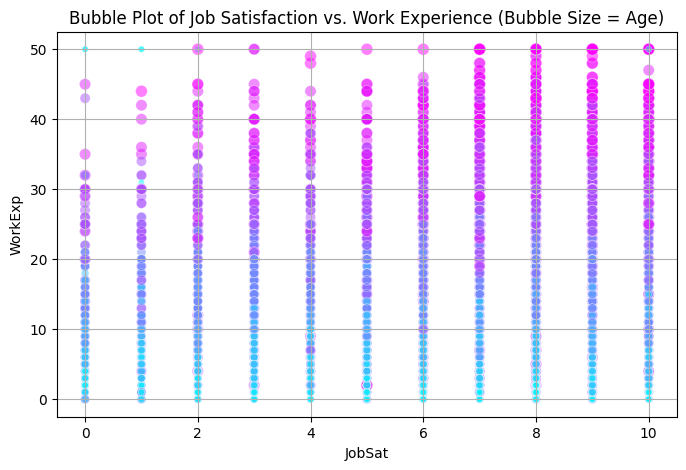

In [46]:

# Creating the bubble plot
plt.figure(figsize=(8, 5))
# Create scatter plot with Age as bubble size
sns.scatterplot(x=df1['JobSat'], y=df1['WorkExp'], size=df1['Age_mapped'],hue=df1['Age_mapped'], alpha=0.5, palette='cool', legend=False)

# Adding labels and title
plt.title('Bubble Plot of Job Satisfaction vs. Work Experience (Bubble Size = Age)')
plt.xlabel('JobSat')
plt.ylabel('WorkExp')
plt.grid(True)

# Displaying the plot
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


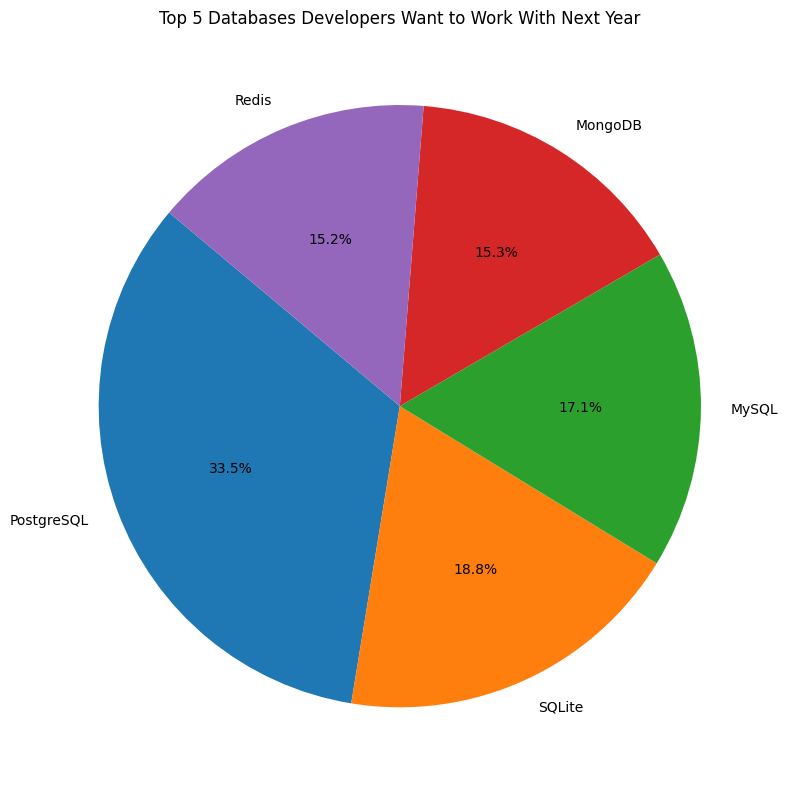

In [58]:
# Step 1: Fetch data from SQL
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 2: Split and normalize semicolon-separated values
all_dbs = df['DatabaseWantToWorkWith'].str.split(';')
flat_list = [db.strip() for sublist in all_dbs for db in sublist]

# Step 3: Count occurrences and get top 5
db_counts = pd.Series(flat_list).value_counts()
top_5 = db_counts.head(5)

# Step 4: Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5.values,
    labels=top_5.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Top 5 Databases Developers Want to Work With Next Year')
plt.axis('equal')
plt.tight_layout()
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `CompTotal` and `ConvertedCompYearly` for the age group 20 to 60.


In [94]:
# Step 1: Query data
df1 = pd.read_sql_query("""
    SELECT CompTotal, ConvertedCompYearly, Age 
    FROM main
""", conn)
import numpy as np
# Map the age to midpoint of range
age_mapping = {'Under 18 years old': 18,
               '18-24 years old': (18+24)/2,
               '25-34 years old': (25+34)/2,
               '35-44 years old': (35+44)/2,
               '45-54 years old': (45+54)/2,
               '55-64 years old': (55+64)/2,
               '65 years or older': 65,
               'Prefer not to say': np.nan  # Can drop or impute
               }

df1["Age_mapped"] = df1["Age"].map(age_mapping)

# Convert Age_mapped and compensation columns to numeric
df1['Age_mapped'] = pd.to_numeric(df1['Age_mapped'], errors='coerce')
df1['CompTotal'] = pd.to_numeric(df1['CompTotal'], errors='coerce')
df1['ConvertedCompYearly'] = pd.to_numeric(df1['ConvertedCompYearly'], errors='coerce')

# Drop rows where Age_mapped is still NaN after conversion
df1 = df1.dropna(subset=['Age_mapped'])


# Filter for Age between 30 and 35
df1_filtered = df1[(df1['Age_mapped'] >= 20) & (df1['Age_mapped'] <= 60)]

# Group by Age_mapped and compute median
df1_grouped = df1_filtered.groupby('Age_mapped')[['CompTotal', 'ConvertedCompYearly']].median().reset_index()


In [95]:
df1_grouped

,Age_mapped,CompTotal,ConvertedCompYearly
0,21.0,63000.0,25000.0
1,29.5,101000.0,59825.0
2,39.5,120000.0,84796.0
3,49.5,130000.0,99099.0
4,59.5,135000.0,109691.0


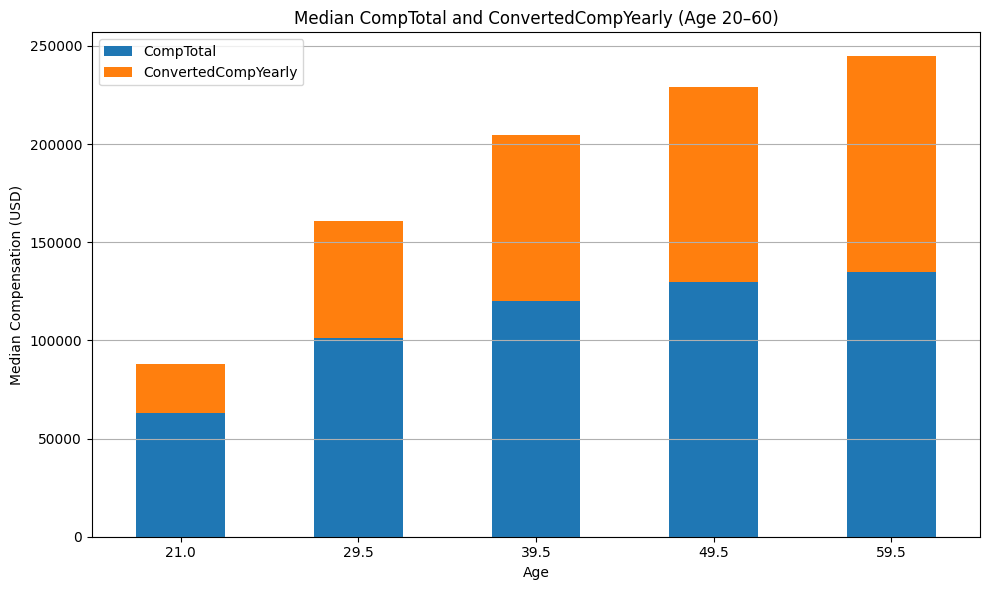

In [98]:
# Step 3: Plot
df1_grouped.plot(
    x='Age_mapped',
    kind='bar',
    figsize=(10, 6),
    stacked=True
)
plt.title('Median CompTotal and ConvertedCompYearly (Age 20–60)')
plt.xlabel('Age')
plt.ylabel('Median Compensation (USD)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 15 to 65.


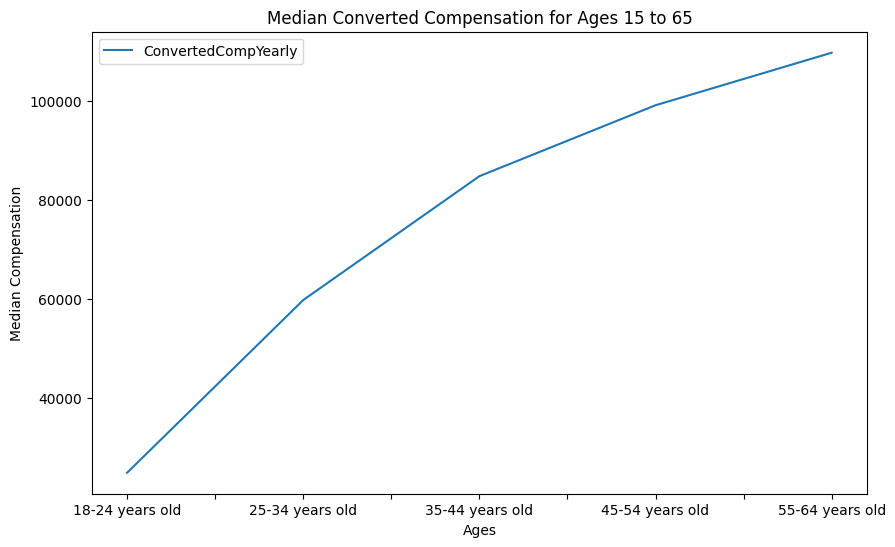

In [134]:
df = pd.read_sql_query("""
    SELECT ConvertedCompYearly, Age FROM main
    WHERE Age BETWEEN 15 AND 65
    """, conn)

# Group by age and compute median
df1 = df.groupby('Age').median()

# Plot
df1.plot(kind='line', figsize=(10, 6), stacked=True)
plt.title('Median Converted Compensation for Ages 15 to 65')
plt.xlabel('Ages')
plt.ylabel('Median Compensation')
plt.show()



**BarChart**

Create a horizontal bar chart using column MainBranch



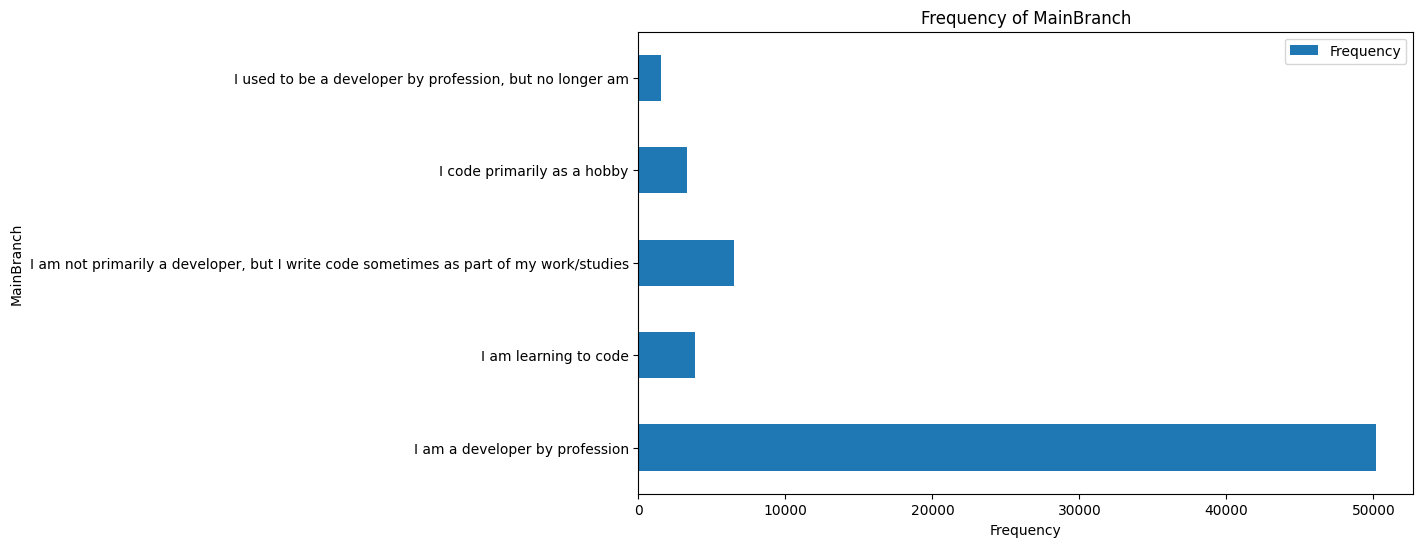

In [133]:
bar_df = pd.read_sql_query("""
    SELECT MainBranch, COUNT(*) as Frequency 
    FROM main
    GROUP BY MainBranch
    """, conn)

# Plot horizontal bar chart
bar_df.plot(kind='barh', x='MainBranch', y='Frequency', figsize=(10, 6))

plt.xlabel('Frequency')
plt.ylabel('MainBranch')
plt.title('Frequency of MainBranch')
plt.show()

### Close the Database Connection




In [136]:
conn.close()